In [24]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
np.random.seed(123)

In [3]:
df = pd.read_excel('../event_class.xlsx', sheet_name=0, header=0)
df.head()

,Sex,Age,FC,PR_int,QRS_axis,QRS_DII,QRS_V1,QRS_V2,QRS_V6,QT_int_V5,...,J_elev_V2,S_width_DI,S_length_DI,R_width_aVR,R_length_aVR,Type1_aVR,Type 1_not_aVR_per,fQRS,ECG utilizzato,classifier
0,M,47.0,66,140.0,30.0,80.0,90,120,90.0,400.0,...,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,acgi60 basale,0
1,M,47.0,67,160.0,30.0,80.0,90,90,80.0,400.0,...,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,acgi60 basale II,0
2,F,41.0,75,170.0,60.0,80.0,80,90,80.0,400.0,...,0.00,0.20,40.0,0.2,40.0,0.0,0.0,0.0,acgi65 basale (V1.V2),0
3,M,28.0,115,160.0,90.0,100.0,100,100,100.0,340.0,...,0.10,0.20,30.0,0.2,30.0,0.0,0.0,0.0,acro85 basale (V1.V2),0
4,M,54.0,83,140.0,-30.0,90.0,80,80,90.0,360.0,...,0.15,0.05,20.0,0.3,30.0,0.0,0.0,1.0,aimo64 basale (V1.V2),0


In [4]:
df.shape

(262, 26)

In [4]:
print('"event" class has a total of {} rows'.format(df.query('classifier == 1').shape[0]))
print('"non-event" class has a total of {} rows'.format(df.query('classifier == 0').shape[0]))

"event" class has a total of 38 rows
"non-event" class has a total of 161 rows


In [6]:
df = df.drop(labels='ECG utilizzato', axis=1)

In [7]:
sex_le = LabelEncoder()
sex_label = sex_le.fit_transform(df['Sex'])
df['Sex'] = sex_label
df.head()

,Sex,Age,FC,PR_int,QRS_axis,QRS_DII,QRS_V1,QRS_V2,QRS_V6,QT_int_V5,...,J_elev_V1,J_elev_V2,S_width_DI,S_length_DI,R_width_aVR,R_length_aVR,Type1_aVR,Type 1_not_aVR_per,fQRS,classifier
0,1,47.0,66,140.0,30.0,80.0,90,120,90.0,400.0,...,0.0,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1,47.0,67,160.0,30.0,80.0,90,90,80.0,400.0,...,0.1,0.10,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0,41.0,75,170.0,60.0,80.0,80,90,80.0,400.0,...,0.0,0.00,0.20,40.0,0.2,40.0,0.0,0.0,0.0,0
3,1,28.0,115,160.0,90.0,100.0,100,100,100.0,340.0,...,0.0,0.10,0.20,30.0,0.2,30.0,0.0,0.0,0.0,0
4,1,54.0,83,140.0,-30.0,90.0,80,80,90.0,360.0,...,0.1,0.15,0.05,20.0,0.3,30.0,0.0,0.0,1.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 199 non-null    int64  
 1   Age                 187 non-null    float64
 2   FC                  199 non-null    int64  
 3   PR_int              198 non-null    float64
 4   QRS_axis            164 non-null    float64
 5   QRS_DII             198 non-null    float64
 6   QRS_V1              199 non-null    int64  
 7   QRS_V2              199 non-null    int64  
 8   QRS_V6              198 non-null    float64
 9   QT_int_V5           198 non-null    float64
 10  QT_int_V2           199 non-null    int64  
 11  cQT_V5              198 non-null    float64
 12  cQT_V2              199 non-null    int64  
 13  Tpeak_Tend_V2       163 non-null    float64
 14  J_Tend_V2           199 non-null    int64  
 15  J_elev_V1           197 non-null    float64
 16  J_elev_V

In [9]:
# df['Age'].fillna(value=df['Age'].mean(), inplace=True)

df = df.fillna(df.mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 199 non-null    int64  
 1   Age                 199 non-null    float64
 2   FC                  199 non-null    int64  
 3   PR_int              199 non-null    float64
 4   QRS_axis            199 non-null    float64
 5   QRS_DII             199 non-null    float64
 6   QRS_V1              199 non-null    int64  
 7   QRS_V2              199 non-null    int64  
 8   QRS_V6              199 non-null    float64
 9   QT_int_V5           199 non-null    float64
 10  QT_int_V2           199 non-null    int64  
 11  cQT_V5              199 non-null    float64
 12  cQT_V2              199 non-null    int64  
 13  Tpeak_Tend_V2       199 non-null    float64
 14  J_Tend_V2           199 non-null    int64  
 15  J_elev_V1           199 non-null    float64
 16  J_elev_V

In [10]:
event_df = df.query('classifier == 1')
nonevent_df = df.query('classifier == 0')

In [11]:
corr = df.corr()
corr_ev = event_df.corr()
corr_nonev = nonevent_df.corr()

<AxesSubplot:>

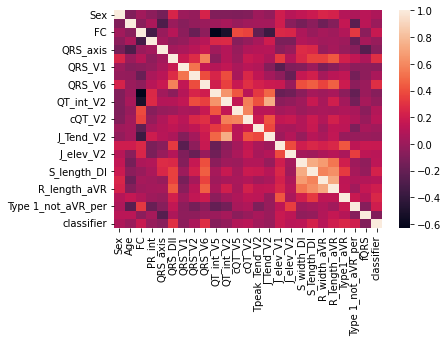

In [14]:
sns.heatmap(corr)

In [ ]:
sns.heatmap(corr_ev)

In [ ]:
sns.heatmap(corr_nonev)

In [126]:
SIG_COL = ('#F55E5A')
BKG_COL = ('#17B3B7')
LIMITS = [[0,1],[2.0,77.0],[44,187],[80.0,280.0],[-75.0,120.0],[60.0,160.0],[50,140],[70,160],[60.0,180.0],[200.0,480.0],[240,520],[336.0,544.0],[20.0,160.0],[30,380],[0.0,1.0],[0.0,1.15],[0.0,0.6],[0.0,100.0],[0.0,0.45],[0.0,100.0],[0.0,1.0],[0.0,1.0],[0.0,1.0],[0,1]]


def plot_column_mod(a, col_sig, col_bkg, nbins, log=False):
   

    # min_feat = col_sig.min() if col_sig.min() <= col_bkg.min() else col_bkg.min()
    # max_feat = col_sig.max() if col_sig.max() >= col_bkg.max() else col_bkg.max()
    # print(min_feat, max_feat)

    # sig = col_sig[(col_sig > xlim[0]-5e-3) & (col_sig < xlim[1]+5e-3)]
    # bkg = col_bkg[(col_bkg > xlim[0]-5e-3) & (col_bkg < xlim[1]+5e-3)]

    a.hist(col_sig, weights=np.ones(len(col_sig)) / len(col_sig), bins=nbins, log=log, label='event', alpha=0.7, color=SIG_COL, antialiased=True, histtype = 'stepfilled')
    a.hist(col_bkg, weights=np.ones(len(col_bkg)) / len(col_bkg), bins=nbins, log=log, label='control', alpha=0.7, color=BKG_COL, antialiased=True, histtype = 'stepfilled')
    
    

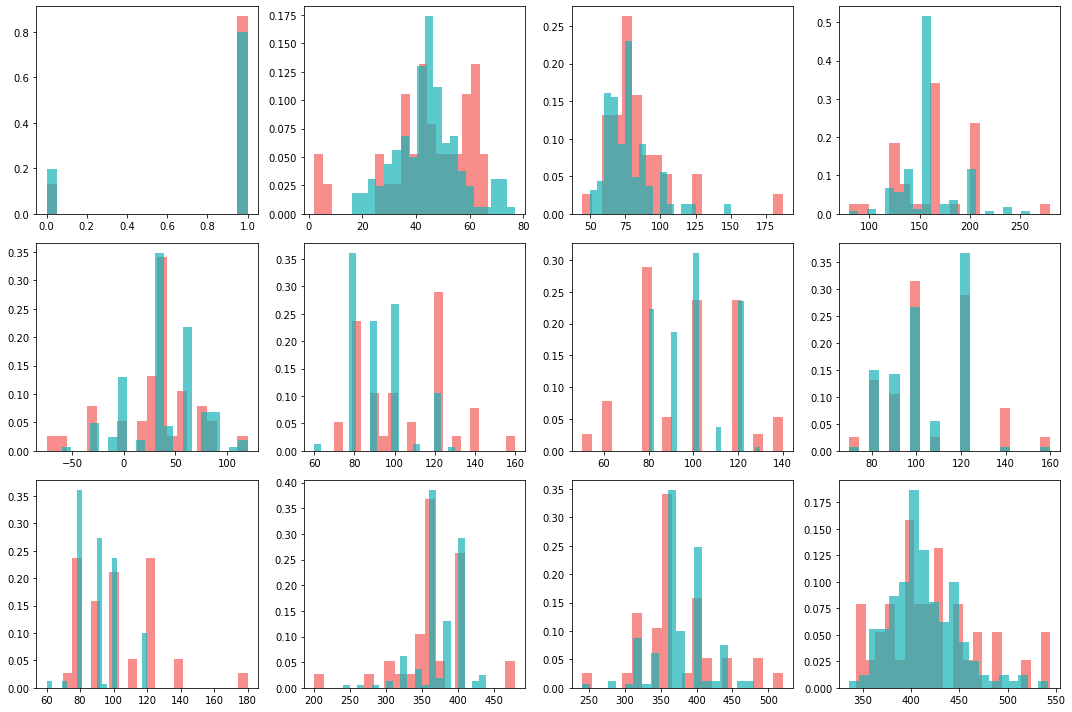

In [127]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for axs, feat,  in zip(axes.flatten(), df.columns[0:12]):
    
    plot_column_mod(axs, event_df[feat], nonevent_df[feat], 20)

    fig.tight_layout()

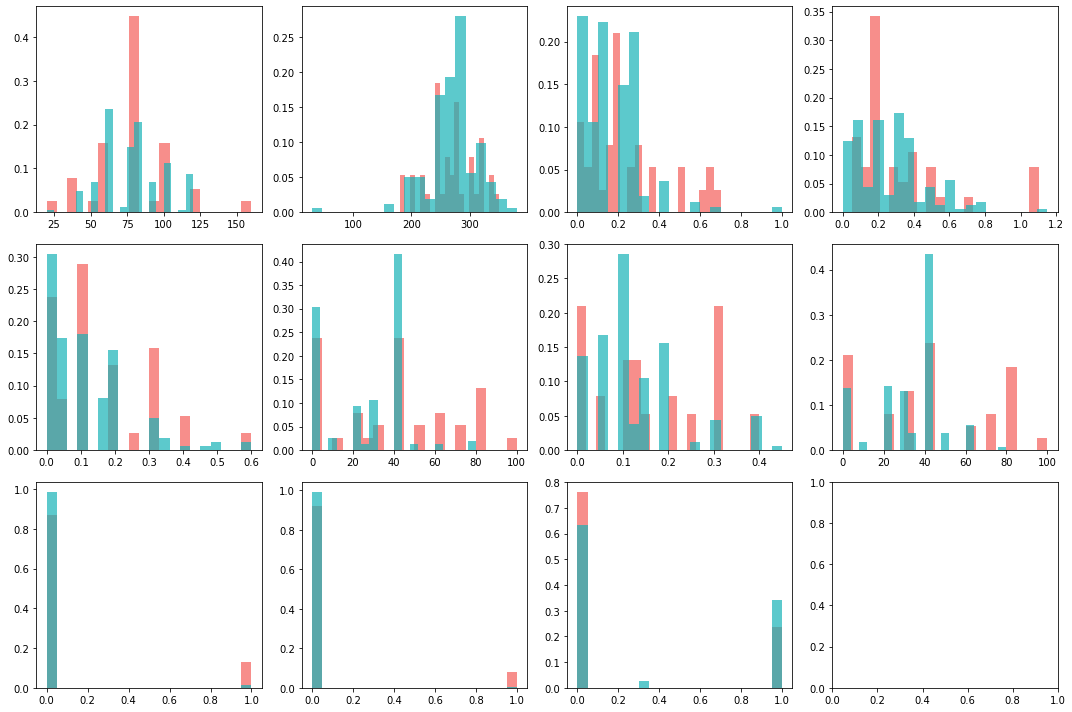

In [129]:
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for axs, feat in zip(axes.flatten(), df.columns[13:24]):
    
    plot_column_mod(axs, event_df[feat], nonevent_df[feat], 20)

    fig.tight_layout()

In [ ]:
sns.pairplot(data=df, hue='classifier')

Text(0.5, 0, 'Event')

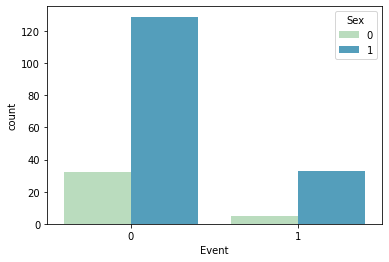

In [15]:
# countplot for event, grouped by sex
sns.countplot(x='classifier', data=df, hue='Sex', order = df['classifier'].value_counts().index, palette='GnBu')
plt.xlabel('Event')

In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 199 non-null    int64  
 1   Age                 199 non-null    float64
 2   FC                  199 non-null    int64  
 3   PR_int              199 non-null    float64
 4   QRS_axis            199 non-null    float64
 5   QRS_DII             199 non-null    float64
 6   QRS_V1              199 non-null    int64  
 7   QRS_V2              199 non-null    int64  
 8   QRS_V6              199 non-null    float64
 9   QT_int_V5           199 non-null    float64
 10  QT_int_V2           199 non-null    int64  
 11  cQT_V5              199 non-null    float64
 12  cQT_V2              199 non-null    int64  
 13  Tpeak_Tend_V2       199 non-null    float64
 14  J_Tend_V2           199 non-null    int64  
 15  J_elev_V1           199 non-null    float64
 16  J_elev_V

In [64]:
# train-test split
X = df.drop(columns='classifier')
y = df['classifier']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [26]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(class_weight='balanced')
# Random search of parameters, using 3 fold cross validation,
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   0.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=311; total time=   0.9s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=   3.1s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=   3.2s
[CV] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1155; total time=   3.5s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=20

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 311, 522, 733,
                                                         944, 1155, 1366, 1577,
                                                         1788, 2000]},
                   random_state=42, verbose=2)

In [27]:
rf_random.best_params_

{'n_estimators': 522,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 60,
 'bootstrap': False}

In [57]:
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    accuracy = accuracy_metric(test_labels, predictions)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

In [69]:
base_model = RandomForestClassifier(n_estimators=1, class_weight='balanced', random_state=42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test.values)

Model Performance
Accuracy = 75.00%.


In [62]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test.values)

Model Performance
Accuracy = 77.50%.


In [63]:
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Improvement of 6.90%.


In [72]:
rf = RandomForestClassifier(class_weight='balanced')
rf_param_grid = {'n_estimators': [600], 'criterion': ['entropy'], 'max_depth': [60]}
rf_cv= GridSearchCV(rf, rf_param_grid, scoring='accuracy', cv=7, n_jobs=-1)
rf_cv.fit(X_train,y_train)

print("Best Score:" + str(rf_cv.best_score_))
print("Best Parameters: " + str(rf_cv.best_params_))

Best Score:0.8489553924336534
Best Parameters: {'criterion': 'entropy', 'max_depth': 60, 'n_estimators': 600}


In [71]:
y_pred = rf_cv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        32
           1       1.00      0.25      0.40         8

    accuracy                           0.85        40
   macro avg       0.92      0.62      0.66        40
weighted avg       0.87      0.85      0.81        40

